# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Mean is 13270.42 and looks appropriate, the standard deviation is is 12105.48 and is quite large as can be seen from the histogram.

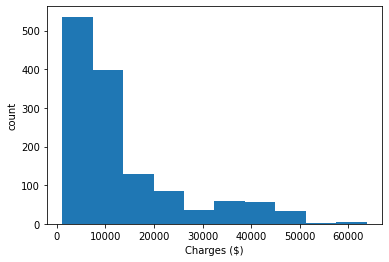

In [4]:
_ = plt.hist(medical['charges'])
_ = plt.xlabel('Charges ($)')
_ = plt.ylabel('count')
plt.show()

In [5]:
mean = np.mean(medical['charges'])
mean

13270.422265141257

In [6]:
std = np.std(medical['charges'])
std

12105.484975561605

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We could see if the 95% confidence interval is and sample the mean, use the t-scores, and determine if values below $12,000 could be there.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ One sided interval would be the appropriate confidence interval as we are only concered with the lower end of this distribution. It seems like 95% confidence interval for the mean is 12725.69 - 13815.15. It seems the administrator should not be concerned as having an average below $1200 seems highly unlikely. 

In [7]:
cv = t.ppf(.95, 1338)
cv

1.645993261580807

In [8]:
std_error = std/np.sqrt(1338)
std_error

330.943713906084

In [9]:
mean_error = cv * std_error
mean_error

544.7311230519407

In [10]:
lower_95 = mean - mean_error
upper_95 = mean + mean_error

In [11]:
print(lower_95, upper_95)

12725.691142089316 13815.153388193197


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypthosesis - the mean charges of people with insurance IS NOT significantly different to the mean of charges for people without insurance. 
Alternate hypthosesis - the mean charges of people with insurance IS significantly different to the mean of charges for people without insurance. 

We are assuming that the variances are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Manual calculation of t-statistic was -28.83070679032691 with p-value = 4.940959071790159e-112. While the computer calculation was T-statistic=-11.893299030876712, pvalue=4.461230231620717e-31. Both pairs of statist

In [12]:
insured = medical[medical['insuranceclaim'] == 1]
insured.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


In [13]:
uninsured = medical[medical['insuranceclaim'] == 0]
uninsured.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [14]:
#calculate mean/std charges of insured and unisured patients
mean_un = np.mean(uninsured['charges'])
mean_in = np.mean(insured['charges'])
std_un = np.std(uninsured['charges'])
std_in = np.std(insured['charges'])
print('The mean charges of people without insurance is', mean_un, 'the standard deviation is', std_un)
print('The mean charges of people with insurance is', mean_in, 'the standard deviation is', std_in)

The mean charges of people without insurance is 8821.421892306294 the standard deviation is 6440.699841605233
The mean charges of people with insurance is 16423.928276537663 the standard deviation is 14036.956250260411


In [15]:
#check n of two groups
print('There are', len(uninsured['charges']), 'people without insurance paying.')
print('There are', len(insured['charges']), 'people with insurance paying.')

There are 555 people without insurance paying.
There are 783 people with insurance paying.


In [16]:
#ensured n of those charged is same as whole DataFrame
print(len(uninsured), len(insured))

555 783


In [17]:
#calculate pooled std of uninsured and insured groups
std_pool = np.sqrt(((554*std_un**2) + (782*std_in**2))/(555+783-2))
std_pool

11512.282899205744

In [18]:
#calculate t-statistic
t2 = (mean_un-mean_in)/(std_pool*np.sqrt(1/555 - 1/783))
t2

-28.83070679032691

In [19]:
#calculate p-value for both bounds
pval = t.sf(np.abs(t2), 554)*2
print('Manual calculation of t-statistic was', t2, 'with p-value =',pval*2)

Manual calculation of t-statistic was -28.83070679032691 with p-value = 4.940959071790159e-112


In [20]:
#recalculate t using scipy.stats.ttest_ind
t2_fast = ttest_ind(uninsured['charges'], insured['charges'])
t2_fast

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No there is no z-test, I believe this is because when a z-test for one sample is the same as calculating the T-test for the mean of ONE group of scores (aka t-test_1samp())

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test